<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/Implenet_MultinomialNB_for_20newsgroup_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#all libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_20newsgroups

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)

In [4]:
#load dataset and create dataframe

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med']
newsgroups = fetch_20newsgroups(
    subset = 'train',
    categories=categories,
    remove=('headers','footers','quotes'),
    shuffle=True,
    random_state=42
)

df = pd.DataFrame(
    {
      'text': newsgroups.data,
      'label': newsgroups.target
    }
)
df.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42,stratify=df['label'])

In [6]:
#vectorization of text
vectorizer = CountVectorizer(stop_words='english',max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
#multinomial model creation and training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

Accuracy 0.923943661971831


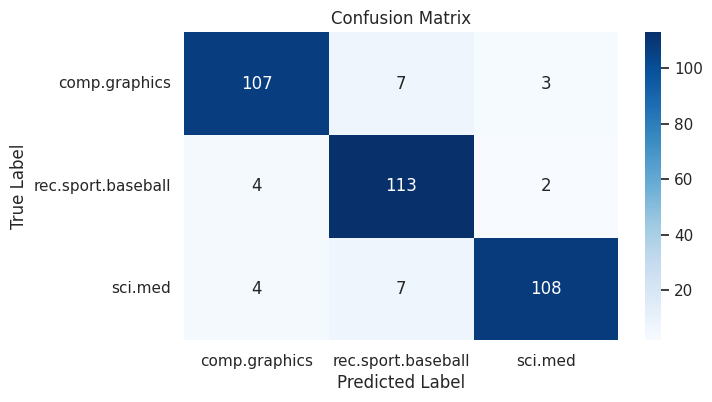

In [11]:
#prediction,accuracy,confussion matrix:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy",accuracy)

sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels = newsgroups.target_names,
    yticklabels = newsgroups.target_names
    )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()